In [2]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import elevation
import os
from rasterio.transform import from_bounds, from_origin
from rasterio.warp import reproject, Resampling
import rasterio

### Create ag field dataset for testing
I did this with geojson.io - just drew some arbitray shapes in the middle of the Grand View, Idaho area

In [3]:
agFields = gpd.read_file('data/map.geojson')
print(agFields.head())

                                            geometry
0  POLYGON ((-116.14463 43.00377, -116.13356 43.0...
1  POLYGON ((-116.14008 43.00069, -116.13416 43.0...
2  POLYGON ((-116.13321 42.99868, -116.12892 42.9...
3  POLYGON ((-116.13313 43.00678, -116.12746 43.0...


In [4]:
# find bounds of field polygons
bounds = agFields.total_bounds
print(bounds)

[-116.14462852   42.99868389 -116.12746239   43.0112374 ]


In [5]:
# split array into indiviual values
west, south, east, north = bounds
print('west bound = ' + str(west))
print('south bound = ' + str(south))
print('east bound = ' + str(east))
print('north bound = ' + str(north))

west bound = -116.14462852478029
south bound = 42.99868389323945
east bound = -116.12746238708495
north bound = 43.01123739785818


In [6]:
# add a little on each side to account for reprojection, translation,
# that can lead to missing data on corners
west, south, east, north = bounds  = west - .05, south - .05, \
                                     east + .05, north + .05

### Download DEM

In [7]:
# download DEM
# using this as guidance: http://geologyandpython.com/dem-processing.html
dem_path = '/data/Grand_View_DEM.tif'
output = os.getcwd() + dem_path
elevation.clip(bounds=bounds, output=output)
dem_raster = rasterio.open('.' + dem_path)

### Plot it to check it out

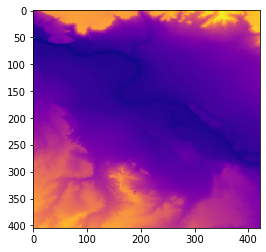

In [12]:
from matplotlib import pyplot
pyplot.imshow(dem_raster.read(1), cmap='plasma')

1) Get raster
2) clip raster to polygon extent
3) Fill
4) Flow accumulation
5) Flow direction
6) Flow distance

In [ ]:
'''
Clip Raster to polygon extent
Syntax
Clip(in_raster, rectangle, out_raster, {in_template_dataset}, 
     {nodata_value}, {clipping_geometry}, 
     {maintain_clipping_extent})
'''
arcpy.Clip_management(
    "image.tif","1952602.23 294196.279 1953546.23 296176.279",
    "clip.gdb/clip", "#", "#", "NONE")